In [6]:
from experimental.remesh.dataset import BubbleDataset
from experimental.remesh.sequence_dataset import BubbleSequence


import matplotlib.pyplot as plt

%load_ext memory_profiler
import numpy as np

import tracemalloc

import loky

In [2]:
from pympler.asizeof import asizeof

In [9]:
tracemalloc.start()

In [19]:
%memit

dataset = BubbleSequence('./bubble-data', 1)

peak memory: 403.71 MiB, increment: 0.00 MiB


In [7]:
import numpy as np

def rotation_matrix_to_y_axis(vector):
    # Normalize the input vector
    vector = vector / np.linalg.norm(vector)
    
    # Compute the angle between the vector and the y-axis
    angle = np.arccos(np.dot(vector, np.array([0, 1])))

    if vector[0] < 0:
        angle = -angle

    # Compute the rotation axis perpendicular to the vector and y-axis
    rotation_axis = np.cross(vector, np.array([0, 1]))

    # Create the rotation matrix
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])

    return rotation_matrix

# Example usage
vector = np.array([-5, 12])  # Example vector
rotation_matrix = rotation_matrix_to_y_axis(vector)
print(rotation_matrix.dot(vector))

[-2.44249065e-15  1.30000000e+01]


In [2]:
bubble_velocities = np.array([(bubble.centroid() - bubble_sequence[i-1].centroid()).numpy() for i, bubble in enumerate(bubble_sequence) if i > 0])


rotation_matrix = rotation_matrix_to_y_axis(bubble_velocities[0, :2])


rotated_velocities = np.array([rotation_matrix.dot(bubble_velocity[:2]) for bubble_velocity in bubble_velocities ])
bubble_centroid_positions =  np.array([bubble.centroid().numpy() for bubble in bubble_sequence])

NameError: name 'bubble_sequence' is not defined

In [3]:
bubble_velocities[0, :2]
print(rotation_matrix.dot(bubble_velocities[0, :2]))
# rotation_matrix



NameError: name 'bubble_velocities' is not defined

In [45]:
# rotation_matrix.dot(bubble_velocities[0, :2])

%memit dataset.__get__(8001)

peak memory: 5962.59 MiB, increment: 0.00 MiB


In [27]:
%memit

def rotate_by_step(prev_vec, current_vec):
    rotation_matrix = rotation_matrix_to_y_axis(prev_vec[:2])

    return rotation_matrix@ current_vec[:2] 

def get_bubble_info(bubble_sequence):

    # start_id = bubble_n*8000

    # end_id = start_id+2000

    # bubble_sequence = np.array([dataset[bubble_id] for bubble_id in range(start_id, end_id)])

    bubble_velocities = np.array([(bubble.centroid() - bubble_sequence[i-1].centroid()).numpy() for i, bubble in enumerate(bubble_sequence) if i > 0])


    rotation_matrix = rotation_matrix_to_y_axis(bubble_velocities[0, :2])


    rotated_velocities = np.array([rotation_matrix.dot(bubble_velocity[:2]) for bubble_velocity in bubble_velocities ])


    rotated_all_velocities = np.array([rotate_by_step(bubble_velocities[i-1], bubble_velocity) for i, bubble_velocity in enumerate(bubble_velocities) if i > 0])
    # rotated_all_velocities = []

    # bubble_centroid_positions =  np.array([bubble.centroid().numpy() for bubble in bubble_sequence])
    return bubble_velocities, rotated_velocities, rotated_all_velocities

peak memory: 431.04 MiB, increment: 0.01 MiB


In [9]:
# %memit

bubble_sequences = []
from loky import get_reusable_executor


executor = get_reusable_executor(max_workers=1, timeout=2)

sequence_n = [ 2,5]
for bubble_n in sequence_n:
    print(bubble_n)
    %memit

    start_id = bubble_n*8000
    end_id = start_id+2000

    def say_hello(k):
        dataset = BubbleDataset(
        './bubble-data',
        remesh_velocity=True,
        target_acceleration=False,
        )
        return get_bubble_info(np.array([dataset[bubble_id] for bubble_id in range(start_id, end_id)]))
    # bubble_sequence = 
    # %memit
    res = executor.submit(say_hello, 8)
    
    # print(res.result())
    bubble_sequences.append(res.result())



2
peak memory: 378.50 MiB, increment: 0.00 MiB
bubble_init [[-1.34648477e-05  8.10886084e-06  1.76687810e-05]
 [ 1.00617806e-05  7.60583276e-06  1.12452388e-05]
 [-5.41776865e-06  1.02901416e-05  2.17501915e-05]
 ...
 [ 6.95353841e-07 -3.72910030e-06  2.68450627e-06]
 [-6.91792746e-07 -5.99402953e-06 -8.07116317e-07]
 [ 4.31946458e-06 -7.92914927e-06  5.54752030e-06]]
bubble_init [[-1.35489355e-05  8.23618499e-06  1.77601435e-05]
 [ 1.03578821e-05  7.85144172e-06  1.17020557e-05]
 [-5.44105449e-06  1.03139576e-05  2.17759175e-05]
 ...
 [-3.37088614e-06 -1.93836855e-06  2.79684425e-05]
 [-1.07428009e-06 -3.19328885e-06  2.79855885e-05]
 [-3.98886855e-06 -2.21822580e-06  2.78359902e-05]]
bubble_init [[-1.36026301e-05  8.32419023e-06  1.78657751e-05]
 [ 1.05668587e-05  8.03152932e-06  1.20589877e-05]
 [-5.46213742e-06  1.03386989e-05  2.17971336e-05]
 ...
 [-4.10242599e-06  5.36916717e-06 -1.91289433e-07]
 [ 3.24259607e-06  4.09829806e-06 -7.24511958e-07]
 [-2.78773523e-06 -6.47522857e-06

In [17]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ["In", "Out", "exit", "quit", "get_ipython", "ipython_vars"]

# Get a sorted list of the objects and their sizes
mem = {
    key: value
    for key, value in sorted(
        [
            (x, asizeof(globals().get(x)))
            for x in dir()
            if not x.startswith("_") and x not in sys.modules and x not in ipython_vars
        ],
        key=lambda x: x[1],
        reverse=True,
    )
}

NameError: name 'asizeof' is not defined

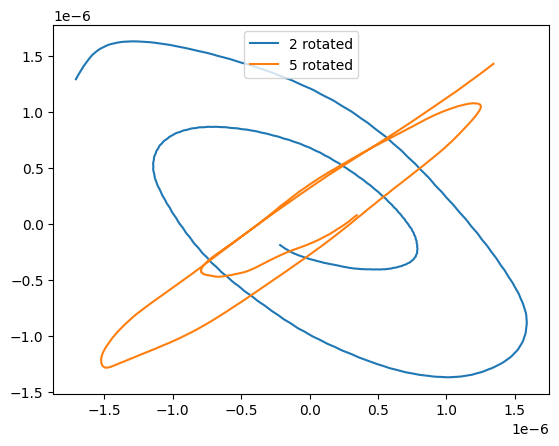

In [32]:
for i in range(0, len(bubble_sequences)):
    # bubble_velocities, rotated_velocities = get_bubble_info(bubble_sequences[i])
    bubble_velocities, rotated_velocities, rotated_all_velocities = bubble_sequences[i]
    smoothed_velocities = running_average_columns(bubble_velocities, 50)

    # plt.plot(rotated_velocities[:, 0], label='rotated')
    # plt.plot(bubble_velocities[:, 0], label='normal')
    plt.plot(smoothed_velocities[:, 0], smoothed_velocities[:,1], label=f'{sequence_n[i]} rotated')
    # plt.plot(bubble_velocities[:, 0], bubble_velocities[:,1], label=f'{i} normal')
    plt.legend()

In [46]:
smoothed_velocities

array([[5.06241697e-08, 5.06241697e-08],
       [4.95513507e-08, 4.95513507e-08],
       [4.83049473e-08, 4.83049473e-08],
       ...,
       [1.55338873e-06, 1.55338873e-06],
       [1.55398279e-06, 1.55398279e-06],
       [1.55390361e-06, 1.55390361e-06]])

In [43]:
rotated_velocities

array([[ 8.96948076e-24,  1.04001377e-07],
       [-6.23770963e-09,  1.04733011e-07],
       [-1.90049535e-09,  9.67119210e-08],
       ...,
       [ 6.75206908e-07,  2.43307535e-06],
       [ 6.72605662e-07,  2.43268240e-06],
       [ 6.75166246e-07,  2.43516015e-06]])

In [17]:
def running_average_3d(arr, window_size):
    shape = arr.shape
    averages = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                window = arr[max(i-window_size//2, 0):min(i+window_size//2+1, shape[0]),
                             max(j-window_size//2, 0):min(j+window_size//2+1, shape[1]),
                             max(k-window_size//2, 0):min(k+window_size//2+1, shape[2])]
                averages[i, j, k] = np.mean(window)

    return averages


def running_average_2d(arr, window_size):
    shape = arr.shape
    averages = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            window = arr[max(i-window_size//2, 0):min(i+window_size//2+1, shape[0]),
                         max(j-window_size//2, 0):min(j+window_size//2+1, shape[1])]
            averages[i, j] = np.mean(window)

    return averages

In [18]:

def running_average_columns(arr, window_size):
    shape = arr.shape
    averages = np.zeros(shape)

    for j in range(shape[1]):
        for i in range(shape[0]):
            window = arr[max(i-window_size//2, 0):min(i+window_size//2+1, shape[0]), j]
            averages[i, j] = np.mean(window)

    return averages

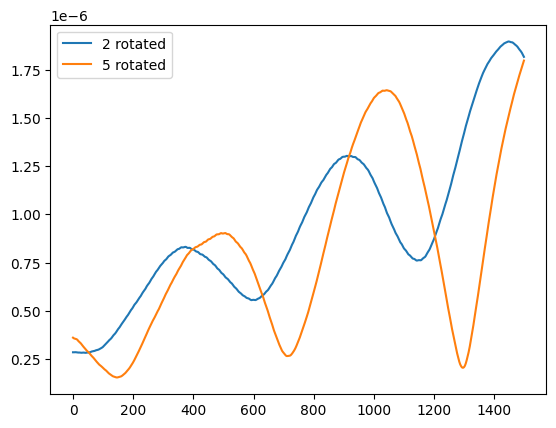

In [35]:
# for i in range(0, len(bubble_sequences)):
%matplotlib inline

window_size = 30
from scipy.ndimage import convolve
for i in range(len(bubble_sequences)):

    # bubble_velocities, rotated_velocities = get_bubble_info(bubble_sequences[i])
    bubble_velocities, rotated_velocities, rotated_all_velocities = bubble_sequences[i]
    
    smoothed_velocities = running_average_columns(bubble_velocities, window_size)
    rotated_all_velocities1 = np.array([rotate_by_step(smoothed_velocities[i-1], bubble_velocity) for i, bubble_velocity in enumerate(smoothed_velocities) if i > 0])
    # print(rotated_velocities[:, 0])
    plt.plot(rotated_all_velocities1[:1500, 1], label=f'{sequence_n[i]} rotated', alpha=1)
    # plt.plot(bubble_velocities[:, 0], label=f'{i} normal')
    # plt.plot(rotated_velocities[:, 0], rotated_velocities[:,1], label='rotated')
    # plt.plot(bubble_velocities[:, 0], bubble_velocities[:,1], label='normal')
    # plt.plot(smoothed_velocities[:, 0], smoothed_velocities[:,1], label=f'{sequence_n[i]} rotated')

    plt.legend()
plt.show()

In [21]:
rotated_all_velocities

array([[ 7.73746169e-10, -5.38188546e-09],
       [-5.11331181e-09,  4.66080261e-09],
       [-2.33351722e-09, -1.48253840e-09],
       ...,
       [-6.54633976e-09,  2.90219474e-09],
       [-6.86303573e-09,  4.43377913e-10],
       [-4.10454725e-09,  5.06954427e-09]])